# Loading Dataset & Quick Overview
   * sklearn 波士頓房價預測資料集

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 15
# 讀取檔案
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [2]:
print(data.shape)  #  data ==> Features
print(target.shape)  # target ==> Label

(506, 13)
(506,)


# Plot Features V.S. Y
Can you explain the relation between other features with house prices?

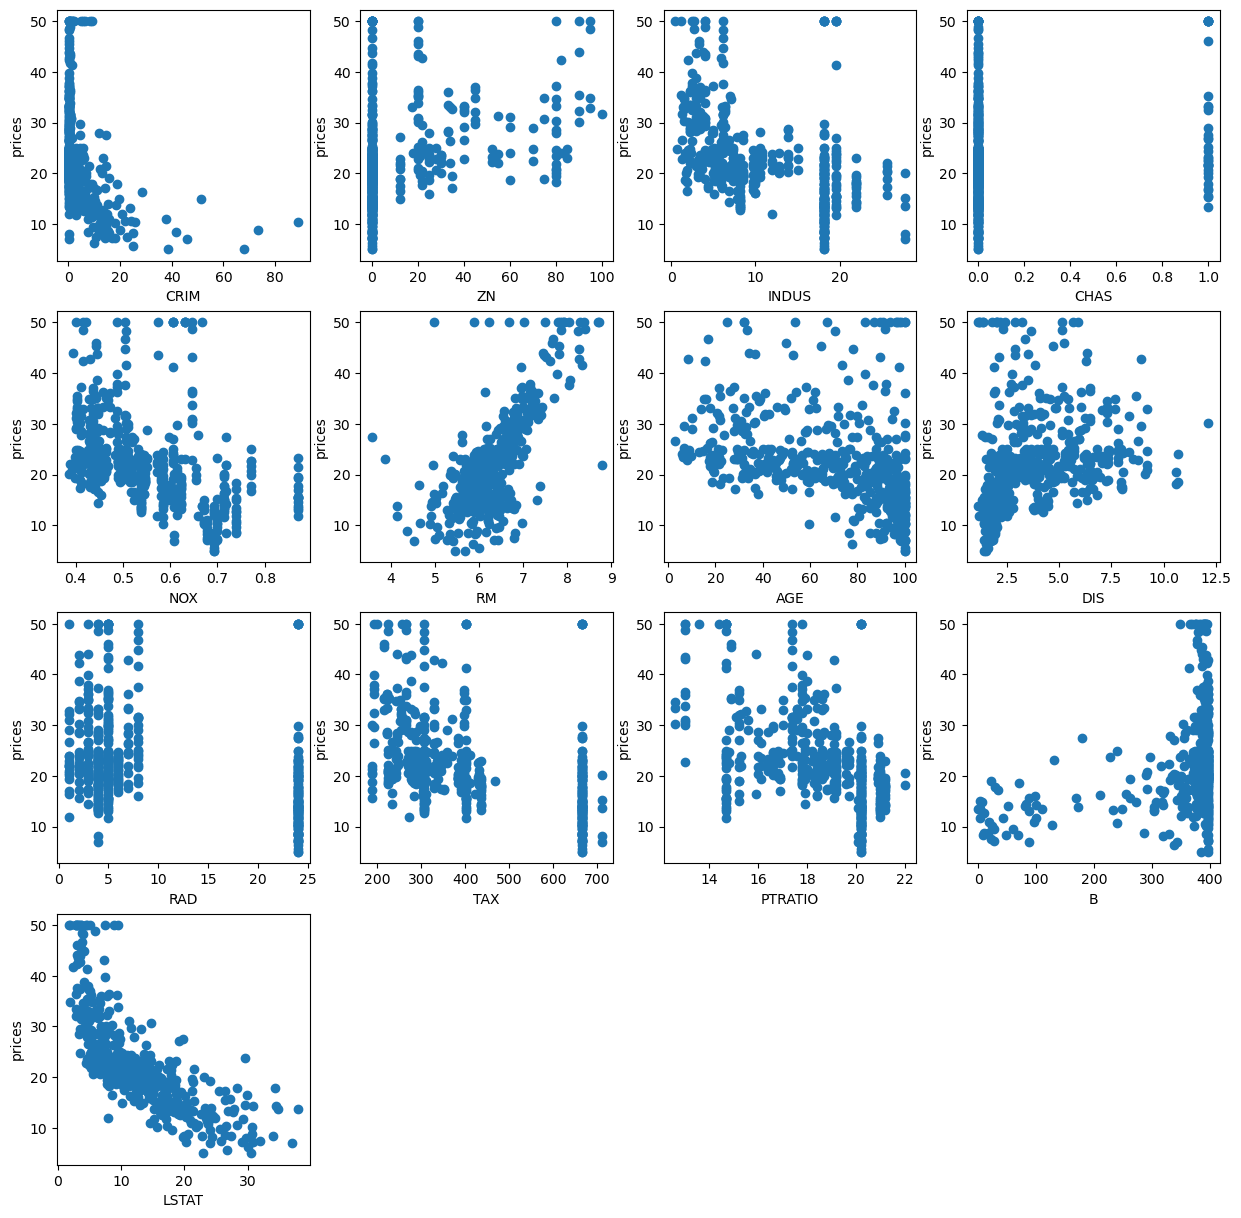

In [6]:
# 練習對所有feature vs y 畫出散佈圖如下

features = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]
for i in range(data.shape[1]):
    plt.subplot(4, 4, i+1)
    plt.scatter(data[:, i], target)
    #plt.xlabel("features {}".format(i+1))
    plt.xlabel(features[i])
    plt.ylabel("prices")
plt.show()
"""
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
"""
pass

# Predicting Home Prices: Simple Linear Regression

In [ ]:
'''Perform any data transformation here'''

# Testing & Training Split
將feature資料放到X內,label資料放到y內，然後做訓練和測試急的切割。

In [8]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.model_selection import train_test_split

X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True)  #

# Import Linear Regression & Train model with x_train, y_train

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model = '''train a linear model using training dataset here'''
model.fit(X_train, y_train)

LinearRegression()

# Predict y_test by X_test data

In [10]:
# make prediction here
# y_pred = '''make prediction on testing dataset here'''
y_pred = model.predict(X_test)

# Visulaize Linear Regression Result

RMS: 4.552364598463056
R2:0.67


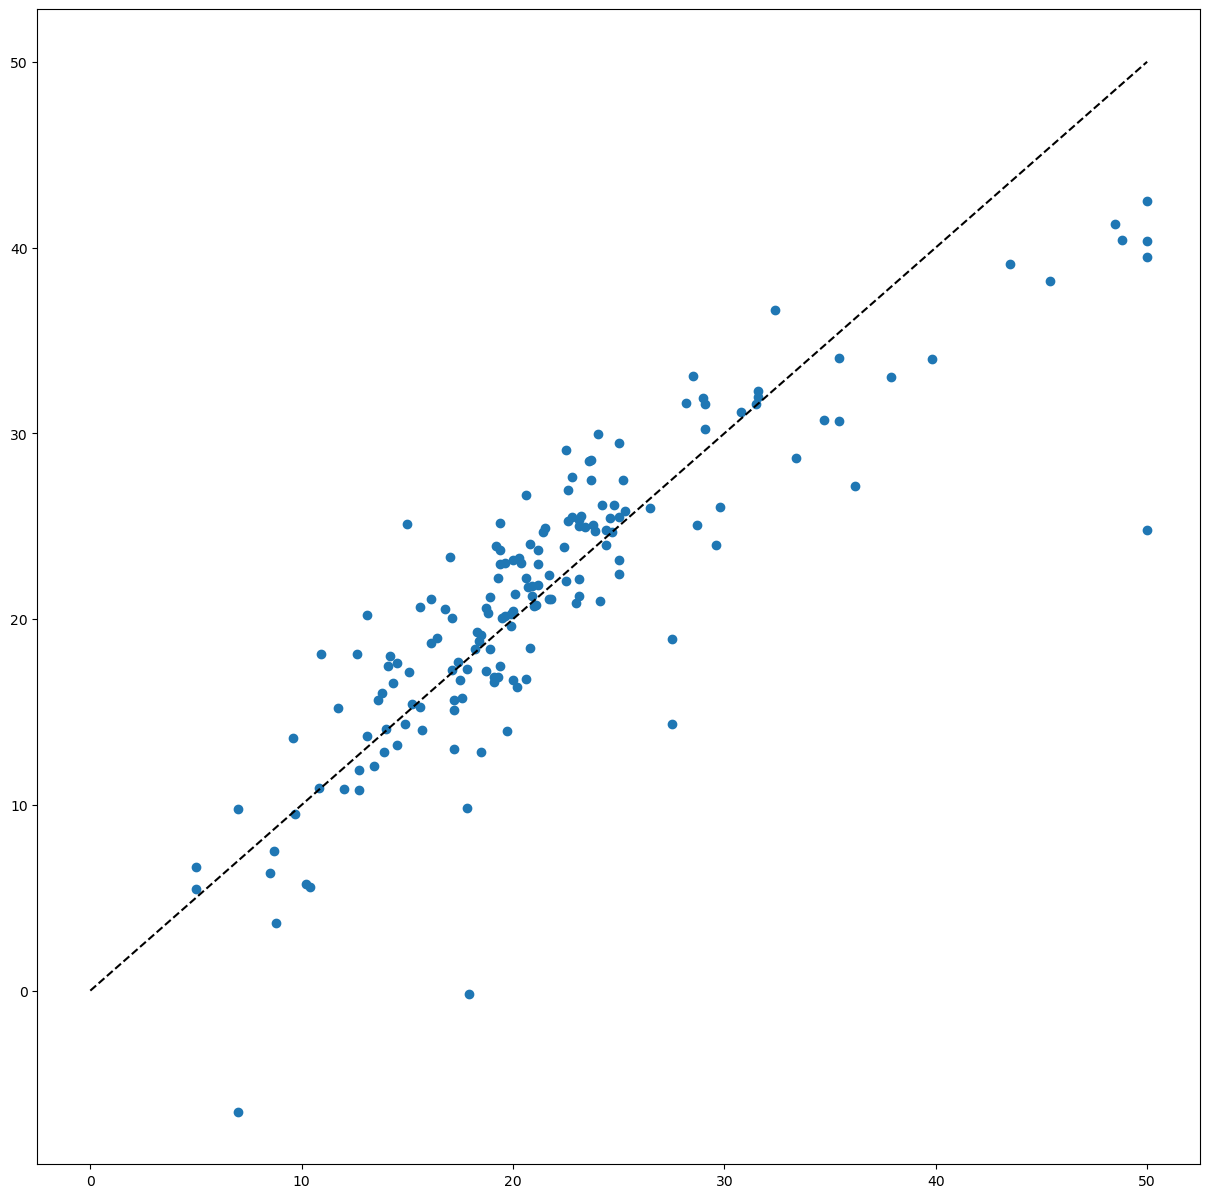

In [14]:
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
print("RMS:", np.sqrt(np.mean((y_pred - y_test)**2)))
print('R2:%.2f' % metrics.r2_score(y_pred, y_test))

# Import Lasso/Ridge Regression & Train model with x_train, y_train

In [26]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
#from sklearn.linear_model import Ridge
#model = Ridge(alpha=0.0001)
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.0001)
# model = '''train a linear model using training dataset here'''
model.fit(X_train, y_train)

Ridge(alpha=0.0505)

# Visualize the Result

RMS: 4.554930144349082
R2:0.67


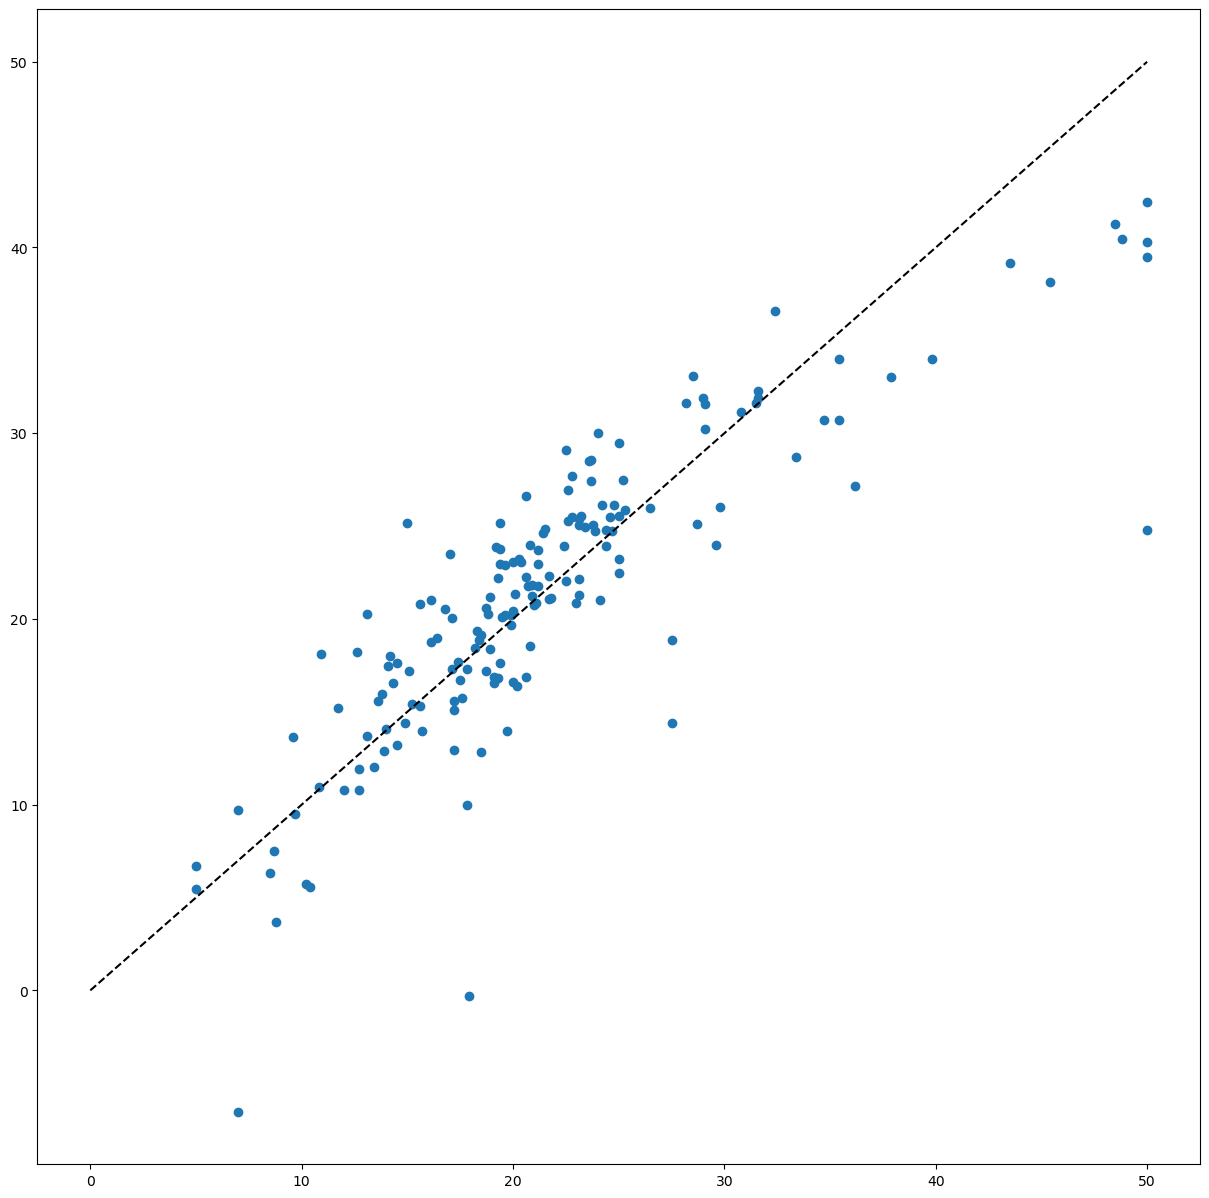

In [27]:
from sklearn import metrics
y_pred = model.predict(X_test)
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
print("RMS:", np.sqrt(np.mean((y_pred - y_test)**2)))
print('R2:%.2f' % metrics.r2_score(y_pred, y_test))